# Klasifikasi Genre dan Emosi Berdasarkan Lirik Lagu

## Anggota Tim
1. Ardian Kurniawan (150708254)
2. Melita Dwi Nugroho (150708365)
3. Denhaningrat Alensana (150708527)
4. Desya Kristianto (150708563)
5. Stefanus Ray Ameniawan (150708605)

## LATAR BELAKANG
### POIN 1
Pemanfaatan musik digital saat ini masih kurang. Rekomendasi lagu berdasarkan emosi atau suasana hati merupakan salah satu ide kelompok kami untuk meninjau lebih jauh lagi penggunaan musik digital, sehingga masyarakat mampu mengenali dan memilih lagu tidak hanya berdasarkan dengan jenis musik yang mereka minati, tetapi berdasarkan bedasarkan suasana hati setiap masing-masing individu.
### POIN 2
Sulitnya mengklasifikasi emosi atau suasana hati sebuah lagu menggunakan lirik sebagai dasar klasifikasi. Dataset lirik yang dipakai juga akan menggunakan lirik berbahasa indonesia.

## OBJECTIVE
Tujuan dari ide projek kelompok kami adalah untuk mengklasifikasi genre dan emosi lagu berdasarkan liriknya.

## LIBRARIES

In [1]:

import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from gensim import models
import pandas as pd
import numpy as np

D:\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### 1. Proses pemanggilan dataset

In [2]:
data=pd.read_csv('dataset_lirik.csv')
data['category_id'] = data['Genre'].factorize()[0]
data[1100:1127]

,Lirik,Emosi,Genre,Judul,Penyanyi,Tanggal Rilis,Tahun Liris,Album,category_id
1100,Sampai kapankah aku menunggumu\nMembuka hatimu...,takut,pop,Beri aku waktu,Ungu,Mei 2009,2009,Pengusasa Hati,0
1101,Sayangku dapatkah kau merasakan\nBetapa besarn...,takut,pop,Selamanya,Ungu,Oktober 2010,2010,1000 Kisah satu Hati,0
1102,Setelah ku gagal cinta\nKu terhanyut dalam sep...,takut,pop,Puing Kenangan,Ungu,NaN,NaN,Timeless,0
1103,Saat tiba nafas di ujung hela\nMata tinggi tak...,takut,pop,Bila Tiba,Ungu,NaN,NaN,Single,0
1104,Torang nin tahu kapan tu badai datang\nTorang ...,takut,pop,Baku Jaga,Ungu,NaN,2014,Single,0
1105,Kaulah cinta pertamaku\nYang mampu membuatku t...,takut,pop,Gagal Bercinta,Armada,NaN,2008,Balas Dendam,0
1106,Salahkah bila aku mencintaimu\nDan berharap en...,takut,pop,Cinta Itu Buta,Armada,NaN,2009,Hal Terbesar,0
1107,Semuanya telah kuberi\nDengan kesungguhan hati...,takut,pop,Mau Dibawa Kemana,Armada,NaN,2009,Hal Terbesar,0
1108,Terlalu banyak masalah\nMengganggu hubungan ki...,takut,pop,Jangan Marah Lagi,Armada,NaN,2014,Pagi Pulang Pagi,0
1109,adek sayang kamu kenapa\nkok mukanya cemberut ...,takut,pop,Dengerin Abang,Armada,NaN,2017,Maju Terus Pantang Mundur,0


## DATASET
### Sumber
Sumber dataset untuk projek kelompok kami berasal dari web 

https://lirik.kapanlagi.com/

https://www.azlyrics.com/

https://genius.com/

http://lyrics.wikia.com/wiki/

Pengambilan data secara manual masing-masing anggota minimal 200 lirik dengan mengcopy paste, dan proses pelabelan data(berdasarkan genre dan emosi). Data kami simpan ke dalam sheet excel dan berbentuk csv.

### Karakteristik
Silahkan isi bagian ini dengan karakteristik dari dataset kelompok Anda, misal jumlah untuk masing-masing label, dan lain-lain



In [3]:
data.groupby('Genre').count()

,Lirik,Emosi,Judul,Penyanyi,Tanggal Rilis,Tahun Liris,Album,category_id
Genre,,,,,,,,
dangdut,141,141,141,139,14,59,50,141
easy listening,1,1,1,1,1,1,1,1
indie,188,188,188,188,1,1,1,188
jazz,2,2,2,2,2,2,2,2
pop,688,688,688,688,322,421,431,688
rock,107,107,107,107,30,30,28,107


In [4]:
data.groupby('Emosi').count()

,Lirik,Genre,Judul,Penyanyi,Tanggal Rilis,Tahun Liris,Album,category_id
Emosi,,,,,,,,
benci,2,2,2,2,1,1,1,2
bingung,11,11,11,11,0,2,1,11
bosan,2,2,2,2,0,0,0,2
cinta,139,139,139,139,4,7,5,139
jijik,15,15,15,15,8,10,10,15
kagum,3,3,3,3,0,0,0,3
kecewa,18,18,18,18,0,2,2,18
marah,111,111,111,111,52,75,74,111
ragu,2,2,2,2,0,2,2,2


In [5]:
feature=data.iloc[:,0]
label=data.iloc[:,2]
label_emosi=data.iloc[:,1]
print(feature[1:5])
print("-----------------")
print(label[1:5])
print(label_emosi[1:5])
print(data['Genre'][5])
print(data['Emosi'][5])

1    Saat ku rasa semua tlah berbeda\r\nDirimu jadi...
2    Ani, cinta yang pertama\r\nTiada mudah kulupak...
3    Entah bagaimana\r\nDiriku harus melangkah\r\nJ...
4    engkau yang cantik\r\nengkau yang manis\r\neng...
Name: Lirik, dtype: object
-----------------
1       rock
2    dangdut
3       rock
4       rock
Name: Genre, dtype: object
1      benci
2    bingung
3    bingung
4    bingung
Name: Emosi, dtype: object
rock
bingung


In [6]:
X=data.Lirik
Y=data.Genre
print(X.shape)
print(Y.shape)
data['word_count'] =data['Lirik'].apply(lambda x: len(str(x).split(" ")))
data[['Lirik','word_count']].head()

#terdapat sebanyak 1127 baris data lirik beserta dengan label dan emosinya 

(1127,)
(1127,)


,Lirik,word_count
0,"Sudah maafkan aku, segala salahku\nDan bila ka...",118
1,Saat ku rasa semua tlah berbeda\r\nDirimu jadi...,71
2,"Ani, cinta yang pertama\r\nTiada mudah kulupak...",83
3,Entah bagaimana\r\nDiriku harus melangkah\r\nJ...,37
4,engkau yang cantik\r\nengkau yang manis\r\neng...,81


In [7]:
print(data['Genre'].unique())
data['Emosi'].unique()



['pop' 'rock' 'dangdut' 'indie' 'jazz' 'easy listening']


array(['benci', 'bingung', 'bosan', 'cinta', 'jijik', 'kagum', 'kecewa',
       'marah', 'ragu', 'rindu', 'sedih', 'semangat', 'senang', 'simpati',
       'takut', 'terkejut'], dtype=object)

In [8]:
data_filtered_df=data[pd.notnull(data['Genre'])]
data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1126
Data columns (total 10 columns):
Lirik            1127 non-null object
Emosi            1127 non-null object
Genre            1127 non-null object
Judul            1127 non-null object
Penyanyi         1125 non-null object
Tanggal Rilis    370 non-null object
Tahun Liris      514 non-null object
Album            513 non-null object
category_id      1127 non-null int64
word_count       1127 non-null int64
dtypes: int64(2), object(8)
memory usage: 96.9+ KB


<Figure size 720x432 with 0 Axes>

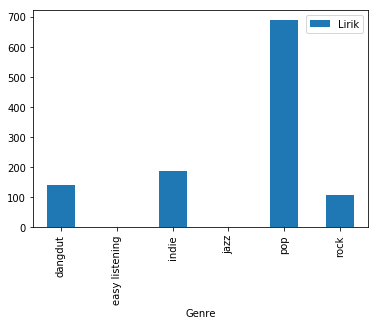

In [73]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
df=data_filtered_df[['Lirik','Genre']]
df.groupby('Genre').count().plot.bar(ylim=0)
plt.show()

<Figure size 720x432 with 0 Axes>

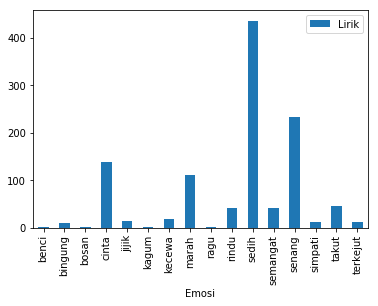

In [74]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
df=data_filtered_df[['Lirik','Emosi']]
df.groupby('Emosi').count().plot.bar(ylim=0)
plt.show()

In [75]:
from io import StringIO
col = ['Genre', 'Lirik']
df = data[col]
df = df[pd.notnull(data['Lirik'])]
df.columns = ['Genre', 'Lirik']
df['category_id'] = df['Genre'].factorize()[0]
category_id_df = df[['Genre', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Genre']].values)
df.head()


,Genre,Lirik,category_id
0,pop,"Sudah maafkan aku, segala salahku\nDan bila ka...",0
1,rock,Saat ku rasa semua tlah berbeda\r\nDirimu jadi...,1
2,dangdut,"Ani, cinta yang pertama\r\nTiada mudah kulupak...",2
3,rock,Entah bagaimana\r\nDiriku harus melangkah\r\nJ...,1
4,rock,engkau yang cantik\r\nengkau yang manis\r\neng...,1


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
# sublinear_df is set to True to use a logarithmic form for frequency.
# min_df is the minimum numbers of documents a word must be present in to be kept.
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
features = tfidf.fit_transform(df.Lirik).toarray()
features.shape

(1124, 3384)

In [77]:
df.shape
labels = df.category_id


from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Emosi, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  
  print("# '{}':".format(Emosi))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
  

# 'dangdut':
  . Most correlated unigrams:
. nggak
. kalau
  . Most correlated bigrams:
. bagi orang
. ya ya
# 'indie':
  . Most correlated unigrams:
. senja
. hujan
  . Most correlated bigrams:
. kita pernah
. pagi ku
# 'pop':
  . Most correlated unigrams:
. cuma
. kalau
  . Most correlated bigrams:
. kita semua
. ya ya
# 'rock':
  . Most correlated unigrams:
. inginnya
. indonesia
  . Most correlated bigrams:
. pernah menyerah
. indonesia indonesia


### Penyiapan Data
Silahkan isi bagian ini dengan langkah-langkah yang kelompok Anda lakukan untuk menyiapkan data yang terkumpul sehingga siap untuk diproses dalam pemodelan


## sebelum dilakukan preprocessing
    data genre yang hanya 1 dan 2, tidak seimbang dengan data yang lain juga dihapus
    \n dan \r harus dibuang terlebih dahulu
    beberapa kata khusus seperti Kembali ke Reff dihapus
    

 Preprosesing
    
    a. Mengubah data lirik, label genre dan emosi menjadi huruf kecil, Dengan menggunakan fungsi lowercase
    
    b. Penghapusan kata - kata noise yang terdapat dalam lirik seperti reff, repeat, wanita, pria, verse dll, termasuk menghapus  angka 
    
    c. Mennggunakan fungsi Repeatchar Normalize
    
    d. Menggunakan fungsi Remove Word Lyric
    
    e. Remove_Stopwords,Removing Bracket, Special Character
    
    f. Tokenisasi data
    
    g. Anotasi Text dengan Pos tags
    
    h. Lemmatize Text

# PREPROCESSING DATA 

In [11]:
data = data.drop(data[data.Genre=='easy listening'].index)
data = data.drop(data[data.Genre=='jazz'].index)
data.groupby('Genre').count()
print(data.shape)

(1124, 10)


In [12]:
data_lirik=np.array(data["Lirik"])
for index in range(data_lirik.size):
    data_lirik[index]=data_lirik[index].replace('\n',' ').replace('\r',' ').replace('Kembali ke Reff',' ')
data_lirik[0]



'Sudah maafkan aku, segala salahku Dan bila kau tetap bisu, ungkapkan salahmu Dan aku sifatku, dan aku khilafku Dan aku cintaku, dan aku rinduku  Sudah lupakan semua segala berubah Dan kita terlupa, dan kita terluka Dan aku sifatku, dan aku khilafku Dan aku cintaku, dan aku rinduku  Kutanya malam, dapatkah kau lihatnya Perbedaan yang tak terungkapkan Tapi mengapa kau tak berubah Ada apa denganmu oh...  Hanya malam dapat meleburkan Segala rasa yang tak terungkapkan Tapi mengapa kau tak berubah Ada apa denganmu  Dan aku sifatku, dan aku khilafku Dan aku cintaku, dan aku rinduku  Kutanya malam, dapatkah kau lihatnya Perbedaan yang tak terungkapkan Tapi mengapa kau tak berubah Ada apa denganmu oh...  Hanya malam dapat meleburkan Segala rasa yang tak terungkapakan Tapi mengapa kau tak berubah Ada apa denganmu oh...  Kutanya malam,dapatkah kau lihatnya Perbedaan yang tak terungkapkan Tapi mengapa kau tak berubah Ada apa denganmu oh...'

In [13]:
def removeWordsLirik(text):
    words = ['wanita:','pria:','verse','bridge','reff','reff:','repeat','ref','chorus','pre-chorus','“']
    filtered_text = " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() not in words or not w.isalpha())             
    return filtered_text

In [14]:
def removeNumber(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

In [15]:
import nltk

def removeEnglishWords(text):
    words = set(nltk.corpus.words.words())
    filtered_text=" ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() not in words or not w.isalpha())
    return filtered_text

In [16]:
def remove_brackets(text):
    new_text = re.sub(r'\(.*?\)','',text)
    new_text = re.sub(r'\[.*?\]','',text)
    new_text = re.sub(r'\[’…★.*?\]','',text)
    return new_text

In [17]:
#membuat fungsi untuk menghilangkan karakter special 
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens=filter(None,[pattern.sub('',token) for token in tokens])
    filtered_text=' '.join(filtered_tokens)
    
    return filtered_text

In [18]:
#membuat fungsi tokenisasi kata
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

In [19]:
from pattern.en import tag
from nltk.corpus import wordnet as wn

#annotate text tokens with POS tags
def pos_tag_text(text):
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
    tagged_text=tag(text)
    tagged_lower_text=[(word.lower(),penn_to_wn_tags(pos_tag))
                      for word,pos_tag in tagged_text]
    return tagged_lower_text

In [20]:
#membuat fungsi lemmatize teks berdasarkan post Tags
def lemmatize_text(text):
    pos_tagged_text=pos_tag_text(text)
    lemmatize_tokens=[wnl.lemmatize(word,pos_tag) if pos_tag 
                      else word for word,
                      pos_tag in pos_tagged_text]
    lemmatize_text=' '.join(lemmatize_tokens)
    return lemmatize_text

In [21]:
#'z','y','x','w','v','u','t','s','r','q','p','o','n','m','l','k','j','i','h','g','f','e','d','c','b','a',
character=['z','y','x','w','v','u','t','s','r','q','p','n','m','l','k','j','i','h','g','f','e','d','c',
           'b','.',',',':',';','-','...','?','!','(',')','[',']','{','}','<','>','"','/','\'','#','@','★','’','…']
def repeatcharNormalize(text):
    for i in range(len(character)):
        charac_long=5
        while charac_long>=2:
            char=character[i]*charac_long
            text=text.replace(char,character[i])
            charac_long-=1
            
    return text

In [22]:
#membuat fungsi untuk menghilangkan kata kata yang tak penting
#menggunakan nltk indonesia
stopword_list=nltk.corpus.stopwords.words('indonesian')
wnl=WordNetLemmatizer()
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens=[token for token in tokens if token not in stopword_list] #stopword_list
    filtered_text=' '.join(filtered_tokens)
    return filtered_text

In [23]:
#membuat fungsi normalisasi bacaan/corpus dengan menggunakan fungsi2 yg telah dibuat sebelumnya

def normalize_corpus(corpus,tokenize=False):
    normalized_corpus=[]
   
    for text in corpus:
        text=removeWordsLirik(text)
        text=removeNumber(text)
        text=removeEnglishWords(text)
        text=remove_stopwords(text)
        text=remove_special_characters(text)
        text=remove_brackets(text)
        text=lemmatize_text(text)
        text=repeatcharNormalize(text)
        
        normalized_corpus.append(text)
        if tokenize:
            text=tokenize(text)
            normalized_corpus.append(text)
    return normalized_corpus


## PERANCANGAN DAN EVALUASI MODEL

### Model/Algoritma
Silahkan isi bagian ini dengan script algoritma yang kelompok Anda pakai 

In [24]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [25]:
#membuat fungsi dengan menggunakan library bag of word model
def bow_extractor (corpus,ngram_range=(1,1)):
    vectorizer=CountVectorizer(min_df=1,ngram_range=ngram_range,max_features=None)
    features=vectorizer.fit_transform(corpus)
    return vectorizer,features

In [26]:
#bag of words model
#corpus bow

bow_vectorizer,bow_features = bow_extractor(data)
features=bow_features.todense()
print(features)

[[0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]


In [27]:
feature_names=bow_vectorizer.get_feature_names()
print(feature_names)

['album', 'category_id', 'emosi', 'genre', 'judul', 'lirik', 'liris', 'penyanyi', 'rilis', 'tahun', 'tanggal', 'word_count']


In [28]:
import pandas as pd
def display_features(features,feature_name):
    df=pd.DataFrame(data=features, columns=feature_names)
    print(df)

In [29]:
from sklearn.model_selection import train_test_split
#it must relate to the renaming and depreaction of cross_validation submodule to model_selection. Try substituting cross_validation -> model_selection
def prepare_datasets(corpus,labels,test_data_proportion=0.3):
    train_x,test_x,train_Y,test_Y=train_test_split(corpus,labels,test_size=0.33,random_state=35)
    return train_x,test_x,train_Y,test_Y


In [30]:
import sklearn
print (sklearn.__version__)

0.20.0


In [31]:
feature=data_lirik
label=data.iloc[:,2]
label_emosi=data.iloc[:,1]
lowercase= [feature.lower() for feature in feature]
feature=lowercase
train_corpus,test_corpus,train_labels,test_labels=prepare_datasets(feature,label,test_data_proportion=0.3)

In [32]:
norm_train_corpus = normalize_corpus(train_corpus)
norm_test_corpus = normalize_corpus(test_corpus)
''.strip()

''

In [33]:
norm_train_corpus

['u ku berjalan u temukan ku menyerah menunguku ku pulang pelukanya kucari kucari tumbuh mekar dekatku slama slama doanyalah melindungiku u musim berubah u merekahlah kucari kucari tumbuh mekar dekatku slama slama doanyalah melindungiku ku terpisah darinya ku hidup nananana nanana nananana nanana kucari kucari tumbuh mekar dekatku slama slama doanyalah melindungiku kucari kucari kucari kucari tumbuh mekar dekatku slama slama doanya melindungiku mencari mencari mencari mencari mencari mencari mencari mencari mencara mencari mencari mencara',
 'bayang bayang gelap kadang menghantui pikiranku terdengar jerit merindukan kehadiran ku jalani kehidupan kucoba tuk meluruskan bayang hidup ’ ternoda fenomena tlah kurasakan diriku smakin tersiksa ku jalani kehidupan yeah tingalkan menjauhlah ku kau kulakukan tuk sirnakan rindu ku ‘ hangat',
 'ku mimpi tingalah cerita kau meningalkan ku terbayangkan ku jalani sepi dirimu ku sangup merelakan dirimu selamat jalan kau kekasih ku ku kenang kehangatan 

In [34]:
norm_test_corpus

['kekasih ku rindu padamu datanglah temani malamku bawakanlah setangkai cinta putih nirwana ku damba kekasih tungu malam mingu ku hadir disisimu terbuailah kehangatan belai manja penuh kemesraan hatimu rindu rindu sabarlah sayang bertemu nafas kuhembuskan dirimu ku puisikan indah penghantar tidurmu simpan rindu mari rangkai asmara biru kekasih tungu malam mingu ku hadir disisimu terbuailah kehangatan belai manja penuh kemesraan hatimu rindu rindu sabarlah sayang bertemu nafas kuhembuskan dirimu ku puisikan indah penghantar tidurmu hatimu rindu rindu sabarlah sayang bertemu nafas kuhembuskan dirimu ku puisikan indah penghantar tidurmu simpan rindu mari rangkai asmara biru',
 'terangnya dunia dipandanginya indahnya dunia dinikmatinya terang gelap indah suram penglihatan hidup tongkat tangan abadi derita nasib buta hidup dunia gulita suara suara mengenal sekelilingnya meraba meraba raba menyelusuri jalan hidupnya',
 'terkadang hidup mengariskan misteri takan pahami berhenti mencari celah 

In [35]:
from sklearn import metrics
import numpy as np

def get_metrics(true_labels,predicted_labels):
    print('Accuracy: ',np.round(
                        metrics.accuracy_score(true_labels,
                                              predicted_labels),
                                              2))
    print('Precision: ',np.round(
                        metrics.precision_score(true_labels,
                                              predicted_labels,
                                              average='weighted'),
                                              2))
    print('Recall: ',np.round(
                       metrics.recall_score(true_labels,
                                              predicted_labels,
                                              average='weighted'),
                                              2))
    print('F1 Score: ',np.round(
                       metrics.f1_score(true_labels,
                                              predicted_labels,
                                              average='weighted'),
                                              2))

In [36]:
def train_predict_evaluate_model(classifier,
                                 train_features,train_labels,
                                 test_features,test_labels):
    #build model
    classifier.fit(train_features,train_labels)
    
    predictions=classifier.predict(test_features)
    
    get_metrics(true_labels=test_labels,
               predicted_labels=predictions)
    return predictions

In [37]:
#membuat fungsi menggunakan library tfidf transformer setelah corpus
#diubah jadi matrix/vektorisasi oleh bow extractor

def tfidf_transformer(bow_matrix):
    transformer=TfidfTransformer(norm='l2',
                                 smooth_idf=True,
                                 use_idf=True)
    tfidf_matrix=transformer.fit_transform(bow_matrix)
    return transformer,tfidf_matrix


In [38]:
#fungsi ekstraksi dengan menggunakan library tfidf
def tfidf_extractor(corpus,ngram_range=(1,1)):
    vectorizer=TfidfVectorizer(sublinear_tf=True,min_df=5,
                              norm='l2',
                              smooth_idf=True,
                               use_idf=True,
                               ngram_range=ngram_range)
    features=vectorizer.fit_transform(corpus)
    return vectorizer,features



In [39]:
bow_vectorizer,bow_train_features=bow_extractor(norm_train_corpus)
bow_test_features=bow_vectorizer.transform(norm_test_corpus)

#tfidf features
tfidf_vectorizer,tfidf_train_features=tfidf_extractor(norm_train_corpus)
tfidf_test_features=tfidf_vectorizer.transform(norm_test_corpus)

tokenized_train=[nltk.word_tokenize(text)
                for text in norm_train_corpus]
tokenized_test=[nltk.word_tokenize(text)
                for text in norm_test_corpus]


### Evaluasi Model
Silahkan isi bagian ini dengan bagaimana cara kelompok Anda dalam melakukan evaluasi model/algoritma

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neural_network import MLPClassifier

mnb=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nn = MLPClassifier()
bbc = BalancedBaggingClassifier(sampling_strategy='auto',replacement=False,random_state=35)

svm=SGDClassifier(loss='modified_huber',n_iter=1000)
#bbc = BalancedBaggingClassifier()

#svm=SGDClassifier()

print("mnb bow naive bayes")
mnb_bow_predictions=train_predict_evaluate_model(classifier=mnb,
                                                train_features=bow_train_features,
                                                train_labels=train_labels,
                                                test_features=bow_test_features,
                                                test_labels=test_labels)
print("bow svm SGDClassifier")
svm_bow_predictions=train_predict_evaluate_model(classifier=svm,
                                                train_features=bow_train_features,
                                                train_labels=train_labels,
                                                test_features=bow_test_features,
                                                test_labels=test_labels)
print("bow BalancedBaggingClassifier balance")
bbc_bow_predictions=train_predict_evaluate_model(classifier=bbc,
                                                train_features=bow_train_features,
                                                train_labels=train_labels,
                                                test_features=bow_test_features,
                                                test_labels=test_labels)

print("nn mlp classifier bow")
nn_bow_predictions=train_predict_evaluate_model(classifier=nn,
                                                train_features=bow_train_features,
                                                train_labels=train_labels,
                                                test_features=bow_test_features,
                                                test_labels=test_labels)

print("-"*100)



mnb bow naive bayes
Accuracy:  0.77
Precision:  0.77
Recall:  0.77
F1 Score:  0.75
bow svm SGDClassifier


D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Accuracy:  0.73
Precision:  0.73
Recall:  0.73
F1 Score:  0.73
bow BalancedBaggingClassifier balance
Accuracy:  0.58
Precision:  0.66
Recall:  0.58
F1 Score:  0.6
nn mlp classifier bow
Accuracy:  0.74
Precision:  0.74
Recall:  0.74
F1 Score:  0.71
----------------------------------------------------------------------------------------------------


In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
ovs = OneVsRestClassifier(LinearSVC(class_weight="balanced"))

ovs_bow_predictions=train_predict_evaluate_model(classifier=ovs,
                                                train_features=bow_train_features,
                                                train_labels=train_labels,
                                                test_features=bow_test_features,
                                                test_labels=test_labels)
ovs_tfidf_predictions=train_predict_evaluate_model(classifier=ovs,
                                                train_features=tfidf_train_features,
                                                train_labels=train_labels,
                                                test_features=tfidf_test_features,
                                                test_labels=test_labels)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:  0.73
Precision:  0.73
Recall:  0.73
F1 Score:  0.72
Accuracy:  0.75
Precision:  0.75
Recall:  0.75
F1 Score:  0.75


In [42]:
print("tfidf naive bayes")
mnb_tfidf_predictions=train_predict_evaluate_model(classifier=mnb,
                                                train_features=tfidf_train_features,
                                                train_labels=train_labels,
                                                test_features=tfidf_test_features,
                                                test_labels=test_labels)

print("tfidf svm SGDClassifier")
svm_tfidf_predictions=train_predict_evaluate_model(classifier=svm,
                                                train_features=tfidf_train_features,
                                                train_labels=train_labels,
                                                test_features=tfidf_test_features,
                                                test_labels=test_labels)

print("tfidf bbc BalancedBaggingClassifier")
bbc_tfidf_predictions=train_predict_evaluate_model(classifier=bbc,
                                                train_features=tfidf_train_features,
                                                train_labels=train_labels,
                                                test_features=tfidf_test_features,
                                                test_labels=test_labels)

print("tfidf nn")
nn_tfidf_predictions=train_predict_evaluate_model(classifier=nn,
                                                train_features=tfidf_train_features,
                                                train_labels=train_labels,
                                                test_features=tfidf_test_features,
                                                test_labels=test_labels)

tfidf naive bayes
Accuracy:  0.67


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Precision:  0.7
Recall:  0.67
F1 Score:  0.58
tfidf svm SGDClassifier
Accuracy:  0.75
Precision:  0.74
Recall:  0.75
F1 Score:  0.74
tfidf bbc BalancedBaggingClassifier
Accuracy:  0.59
Precision:  0.66
Recall:  0.59
F1 Score:  0.6
tfidf nn
Accuracy:  0.77
Precision:  0.77
Recall:  0.77
F1 Score:  0.76


D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
mnb.fit(bow_train_features,train_labels)
pred_mnb = mnb.predict(bow_test_features)

nn.fit(tfidf_train_features,train_labels)
pred_nn=nn.predict(tfidf_test_features)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_true = test_labels
y_pred = pred_mnb
confusion_matrix(test_labels, pred_mnb)

array([[ 20,   1,  21,   0],
       [  5,  34,  28,   4],
       [  4,   6, 213,   2],
       [  2,   0,  12,  19]], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_true = test_labels
y_pred = pred_nn
confusion_matrix(test_labels, pred_nn)

array([[ 23,   2,  17,   0],
       [  6,  34,  26,   5],
       [  5,   6, 210,   4],
       [  2,   0,   9,  22]], dtype=int64)

In [46]:
print(test_labels.head(10))
print(pred_nn[0:10])
print(accuracy_score(test_labels, pred_nn))

print(test_labels.head(10))
print(pred_mnb[0:10])
print(accuracy_score(test_labels, pred_mnb))


376     dangdut
1066    dangdut
72          pop
552         pop
401     dangdut
344       indie
446         pop
448         pop
465         pop
592         pop
Name: Genre, dtype: object
['indie' 'pop' 'pop' 'pop' 'dangdut' 'pop' 'pop' 'pop' 'pop' 'pop']
0.7789757412398922
376     dangdut
1066    dangdut
72          pop
552         pop
401     dangdut
344       indie
446         pop
448         pop
465         pop
592         pop
Name: Genre, dtype: object
['pop' 'pop' 'pop' 'pop' 'dangdut' 'pop' 'pop' 'pop' 'pop' 'pop']
0.77088948787062


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB



pipe=MultinomialNB().fit(bow_train_features,train_labels)
print("Memprediksi akurasi dengan test set model Naive Bayes")
print("Accuracy Score: "+str(pipe.score(bow_test_features,test_labels)))
y_pred=pipe.predict(bow_test_features)
print(y_pred)
print(test_labels)

Memprediksi akurasi dengan test set model Naive Bayes
Accuracy Score: 0.77088948787062
['pop' 'pop' 'pop' 'pop' 'dangdut' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'indie' 'dangdut' 'pop' 'rock' 'pop'
 'dangdut' 'indie' 'pop' 'dangdut' 'indie' 'pop' 'pop' 'dangdut' 'pop'
 'pop' 'pop' 'pop' 'pop' 'dangdut' 'pop' 'pop' 'pop' 'pop' 'indie' 'pop'
 'pop' 'pop' 'pop' 'dangdut' 'pop' 'pop' 'pop' 'indie' 'pop' 'pop' 'pop'
 'pop' 'pop' 'dangdut' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'indie' 'pop' 'indie' 'pop' 'pop' 'indie' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'rock' 'pop' 'pop' 'pop' 'pop' 'pop' 'rock' 'pop' 'pop'
 'pop' 'pop' 'pop' 'rock' 'pop' 'rock' 'pop' 'pop' 'pop' 'dangdut' 'rock'
 'indie' 'dangdut' 'pop' 'pop' 'indie' 'pop' 'indie' 'indie' 'pop' 'pop'
 'pop' 'pop' 'rock' 'indie' 'rock' 'pop' 'pop' 'pop' 'pop' 'dangdut' 'pop'
 'pop' 'pop' 'pop' 'dangdut' 'dangdut' 'pop' 'indie' 'pop' 'indie' 'pop'
 'pop' 'indie' 'pop' 'pop' 'pop' 'roc

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier


pipe=MLPClassifier().fit(tfidf_train_features,train_labels)

print("Memprediksi akurasi dengan test set model Neural Network")
print("Accuracy Score: "+str(pipe.score(tfidf_test_features,test_labels)))
y_pred=pipe.predict(tfidf_test_features)
print(y_pred)
print(test_labels)
pipe=MLPClassifier()

Memprediksi akurasi dengan test set model Neural Network
Accuracy Score: 0.7789757412398922
['indie' 'pop' 'pop' 'pop' 'dangdut' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'indie' 'pop' 'pop' 'pop' 'pop' 'pop' 'indie' 'dangdut' 'pop' 'rock'
 'pop' 'indie' 'indie' 'pop' 'pop' 'indie' 'pop' 'pop' 'dangdut' 'pop'
 'pop' 'pop' 'pop' 'pop' 'dangdut' 'pop' 'pop' 'pop' 'pop' 'indie' 'pop'
 'pop' 'pop' 'rock' 'dangdut' 'pop' 'dangdut' 'pop' 'indie' 'pop' 'pop'
 'pop' 'dangdut' 'pop' 'dangdut' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'dangdut' 'dangdut' 'pop' 'pop' 'pop' 'indie' 'pop' 'pop' 'indie' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'rock' 'pop' 'pop' 'pop' 'pop' 'pop'
 'rock' 'pop' 'pop' 'pop' 'pop' 'pop' 'rock' 'pop' 'rock' 'pop' 'pop'
 'pop' 'dangdut' 'rock' 'indie' 'dangdut' 'pop' 'pop' 'indie' 'pop'
 'indie' 'indie' 'pop' 'pop' 'pop' 'pop' 'rock' 'indie' 'rock' 'pop' 'pop'
 'pop' 'indie' 'dangdut' 'pop' 'pop' 'pop' 'pop' 'dangdut' 'dangdut' 'pop'
 'indie' 'pop' 'indie' 'pop' 'pop' 'indie' 'p

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


text_clf = Pipeline([('vect', TfidfVectorizer(sublinear_tf=True,min_df=5,
                              norm='l2',
                              smooth_idf=True,
                               use_idf=True,
                               ngram_range=(1,1))),
                     ('tfidf', TfidfTransformer(norm='l2',
                                 smooth_idf=True,
                                 use_idf=True)),
                      ('clf', MLPClassifier())])


# #data dinormalisasi
# text_clf.fit(norm_train_corpus, train_labels)
# y_pred=text_clf.predict(norm_test_corpus)
# print("Accuracy Score dinormalisasi: "+str(text_clf.score(norm_test_corpus,test_labels)))
# from sklearn.metrics import f1_score

# print(f1_score(test_labels,y_pred, average='micro'))



#tanpa dinormalisasi 
text_clf.fit(train_corpus, train_labels)
print("Accuracy Score tanpa dinormalisasi : "+str(text_clf.score(test_corpus,test_labels)))
y_pred=text_clf.predict(test_corpus)
print(f1_score(test_labels,y_pred, average='micro'))

Accuracy Score tanpa dinormalisasi : 0.77088948787062
0.7708894878706198


In [67]:

tempRest = [text_clf,data]


from sklearn.externals import joblib
joblib.dump(tempRest,'neuralNetworkClassifier.pkl')
newClf = joblib.load('neuralNetworkClassifier.pkl')

In [68]:

print(text_clf.predict((["Pergilah kau Pergi dari hidupku Bawalah semua rasa bersalahmu Pergilah kau Pergi dari hidupku Bawalah rahasiamu yang tak ingin kutahui"])))

['pop']


In [69]:

print(text_clf.predict((["seminggu setelah kau pergi teman silih berganti menghiburku berkata semua teratasi kan terus sembunyi di balik senyum palsu ku dengar dirimu tak sendiri lagi"])))

['pop']


In [70]:

print(text_clf.predict((["Memang salah ku  yang tak pernah bisa meninggal kan dirinya  tuk bersama kamu walau tuk terus bersama mastikan ada saat itu"])))

['pop']


In [72]:
text="Makan duren dimalam hari Paling enak dengan kekasih Dibelah bang dibelah Enak bang silahkan dibelah"

print(text_clf.predict([text]))

['dangdut']
